In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

In [11]:
def lorenz(X, t, sigma, rho, beta):
    x,y,z = X
    dx = sigma*(y -x)
    dy = x*(rho -z)
    dz = x*y - beta*z
    return dx, dy, dz

sigma = 10.0
rho = 28.0
beta = 8/3

X0 = [0., 1., 1.06]
dt = 0.01

nb_steps = 10000
t = np.linspace(0, nb_steps*dt, nb_steps)

In [12]:
xs = np.zeros(len(t))
ys = np.zeros(len(t))  
zs = np.zeros(len(t))
xs[0], ys[0], zs[0] = X0

for i in range(len(t) - 1):
    dt = t[i+1] - t[i]
    dx, dy, dz = lorenz([xs[i], ys[i], zs[i]], t, sigma, rho, beta)
    xs[i+1] = xs[i] + dt*dx
    ys[i+1] = ys[i] + dt*dy
    zs[i+1] = zs[i] + dt*dz
    
print(xs[-1], ys[-1], zs[-1])

-1.013896445758515 -1.0595424402305247 17.656497965093088


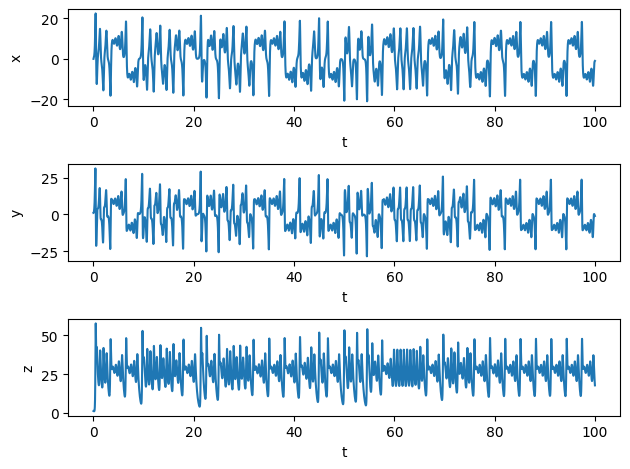

In [13]:
fig = plt.figure()

ax1 = fig.add_subplot(311)
ax1.plot(t, xs)
ax1.set_xlabel('t')
ax1.set_ylabel('x')

ax2 = fig.add_subplot(312)
ax2.plot(t, ys)
ax2.set_xlabel('t')
ax2.set_ylabel('y')

ax3 = fig.add_subplot(313)
ax3.plot(t, zs)
ax3.set_xlabel('t')
ax3.set_ylabel('z')

plt.tight_layout()
plt.show()

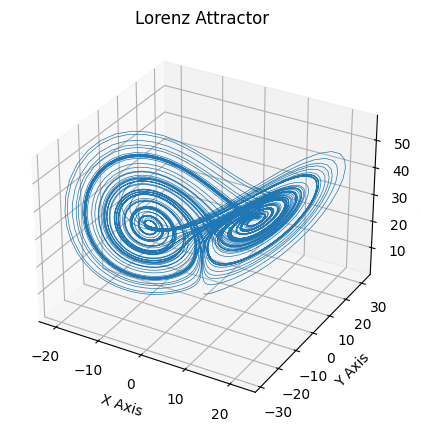

In [14]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.show()

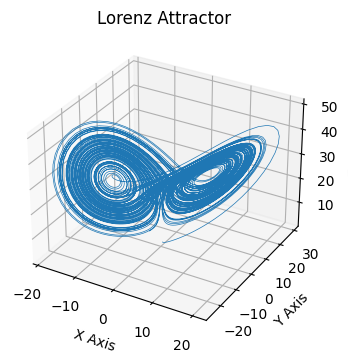

In [18]:
solution = odeint(lorenz, X0, t, args=(sigma, rho, beta))

x, y, z = solution.T

# Plot
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.show()

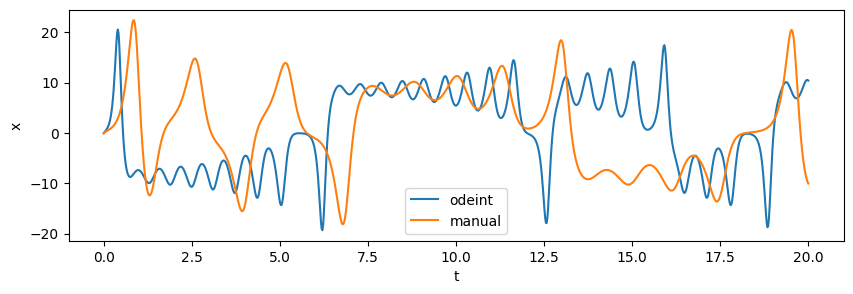

In [25]:
# Compare x and xs
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)
ax.plot(t[:1000], x[:1000], label='odeint')
ax.plot(t[:1000], xs[:1000], label='manual')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.legend()
plt.show()

100%|██████████| 100/100 [00:01<00:00, 75.64it/s]


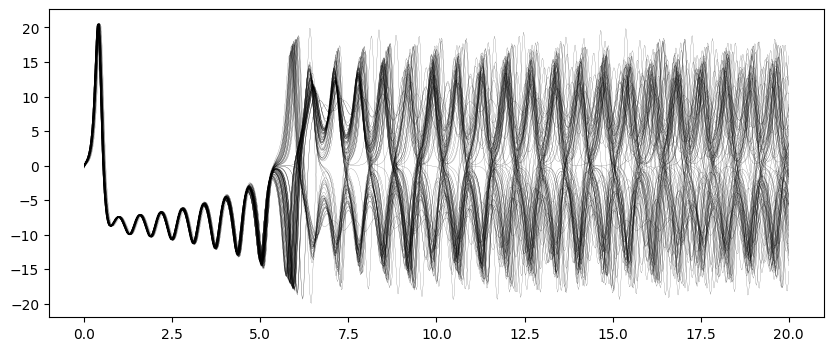

In [21]:
from tqdm import tqdm

trials = 100
solution_list = []
t = np.linspace(0, 20, 1000) 
for i in tqdm(range(trials)):
    perturbation = np.random.normal(0.0, scale=0.15, size=3)
    solution = odeint(lorenz, X0 + perturbation, t, args=(sigma, rho, beta))
    solution_list.append( solution.T )


x_list = []
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
for i in range(len(solution_list)):
    x, y, z = solution_list[i]
    x_list.append(x)
    # ax.plot(t, x, marker='o', markersize=2, lw=0)
    ax.plot(t, x, lw=.1, color='black')

plt.show()

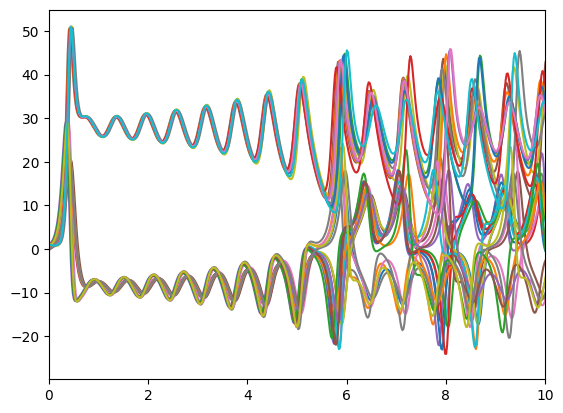

In [27]:
for i in range(10):
    perturbation = np.random.normal(0.0, 0.15, size=3)
    sol = odeint(lorenz, X0 + perturbation, t, args=(sigma, rho, beta))
    plt.plot(t, sol)
plt.xlim(0, 10)
plt.show()

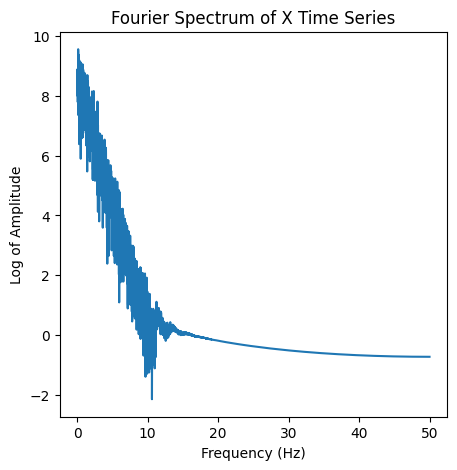

In [30]:
from scipy.fft import fft

# Take the Fourier transform of the x time series
fft_x = fft(xs)

# Calculate the frequency range
dt = 0.01
num_steps = 10000
freq = np.linspace(0, 1/dt, num_steps)
flen = len(freq)//2
# Plot the Fourier spectrum
plt.figure(figsize=(5, 5))
plt.plot(freq[:flen], np.log(np.abs(fft_x)[:flen]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Log of Amplitude")
plt.title("Fourier Spectrum of X Time Series")
plt.show()

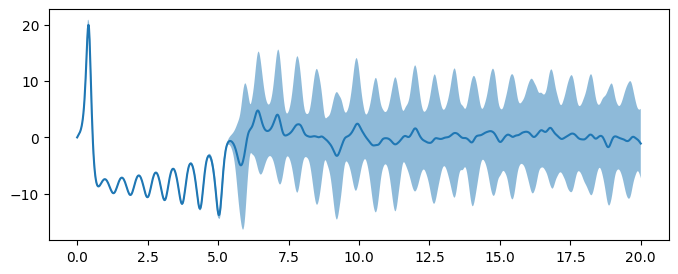

In [31]:
x_arr = np.array(x_list)
x_std = np.std(x_arr, axis=0)
x_mean = np.mean(x_arr, axis=0)

fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(111)
ax.plot(t, x_mean, label='Mean')
ax.fill_between(t, x_mean-x_std, x_mean+x_std, alpha=0.5)
plt.show()